In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder,OneHotEncoder,FunctionTransformer,KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline ,make_pipeline
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,root_mean_squared_error
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import LogisticRegression,LinearRegression   
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('titanic.csv',usecols=['Cabin','Ticket','Survived'])

In [3]:
df

,Survived,Ticket,Cabin
0,0,A/5 21171,NaN
1,1,PC 17599,C85
2,1,STON/O2. 3101282,NaN
3,1,113803,C123
4,0,373450,NaN
...,...,...,...
886,0,211536,NaN
887,1,112053,B42
888,0,W./C. 6607,NaN
889,1,111369,C148


In [4]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [5]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [6]:

##! for numerical data extracting 
df['cabin_num']= df['Cabin'].str.extract('(\d+)')


##* for alphabet col extract
df['cabin_alphabet']=df['Cabin'].str.get(0)

In [7]:
df

,Survived,Ticket,Cabin,cabin_num,cabin_alphabet
0,0,A/5 21171,NaN,NaN,NaN
1,1,PC 17599,C85,85,C
2,1,STON/O2. 3101282,NaN,NaN,NaN
3,1,113803,C123,123,C
4,0,373450,NaN,NaN,NaN
...,...,...,...,...,...
886,0,211536,NaN,NaN,NaN
887,1,112053,B42,42,B
888,0,W./C. 6607,NaN,NaN,NaN
889,1,111369,C148,148,C


<Axes: xlabel='cabin_alphabet'>

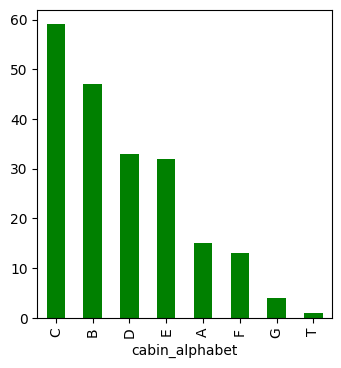

In [8]:
df['cabin_alphabet'].value_counts().plot(kind='bar',figsize=(3.8,4),color='green')

In [9]:

#! ticket 

df['ticket_numerical']= df['Ticket'].str.split( )

In [10]:
df

,Survived,Ticket,Cabin,cabin_num,cabin_alphabet,ticket_numerical
0,0,A/5 21171,NaN,NaN,NaN,"[A/5, 21171]"
1,1,PC 17599,C85,85,C,"[PC, 17599]"
2,1,STON/O2. 3101282,NaN,NaN,NaN,"[STON/O2., 3101282]"
3,1,113803,C123,123,C,[113803]
4,0,373450,NaN,NaN,NaN,[373450]
...,...,...,...,...,...,...
886,0,211536,NaN,NaN,NaN,[211536]
887,1,112053,B42,42,B,[112053]
888,0,W./C. 6607,NaN,NaN,NaN,"[W./C., 6607]"
889,1,111369,C148,148,C,[111369]


In [11]:
df['cat']=df['ticket_numerical'].str.extract(r'')

ValueError: pattern contains no capture groups

In [ ]:
df

,Survived,Ticket,Cabin,cabin_num,cabin_alphabet,ticket_numerical
0,0,A/5 21171,NaN,NaN,NaN,"[A/5, 21171]"
1,1,PC 17599,C85,85,C,"[PC, 17599]"
2,1,STON/O2. 3101282,NaN,NaN,NaN,"[STON/O2., 3101282]"
3,1,113803,C123,123,C,[113803]
4,0,373450,NaN,NaN,NaN,[373450]
...,...,...,...,...,...,...
886,0,211536,NaN,NaN,NaN,[211536]
887,1,112053,B42,42,B,[112053]
888,0,W./C. 6607,NaN,NaN,NaN,"[W./C., 6607]"
889,1,111369,C148,148,C,[111369]
